# Spotify Top Tracks Notebook
### *This notebook will document the process of calling the Spotify API and using the retrieved data to gain insight on listening habits.*

In [4]:
# Import necessary dependencies
import requests
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from tokens import get_access_token

code:  AQAKTxNIXI3eMqudLTEcaJJkU2EBfDuSLt6eqEg4k6fPvX1Q-8xmg04FqFaLZm-grH6So3cZk7jXy5p6TAmg3gpXjY_8XOUvwwtvJI0plovgj8u0Ftqu3YBD7YfLVIiPJ5VE_5IPQC_MdbjYT0arLjQ-67WEkxGraFip9JG8xoisYeM5bxbdyua8VTCfsSn_ayoZB6Mwzb52GKWqgmBcNbuL3bNXOlRnLz03v1i13MPHwc4FLF0LA_TOBw7vQlq35DmwUPPqB415ZXBam_D9qU6FblKH64mLTcqZw0NJ1IQajij857nLDquU4aAfIcgsr2_IuSKd0NGMXstCSbwgQp0


## Retrieve Top Tracks

In [9]:
# Access token from tokens.py
access_token = get_access_token()

headers = {
    'Authorization': f'Bearer {access_token}'
}

# Base url for all Spotify API calls
BASE_URL = 'https://api.spotify.com/v1/'

code:  AQAyatjUyoMK9bjtlxSShjCqDmTfSyAlZP1WobyhcBBRt5XWqAwpPsvAqnSNsfr9_jaiK5-7MwOcOzSkYDkqKUA7LOmjNmfLnLEtid3qVrQyebLCRcqwYfmFfhxCUivZ-RBlwUT7ha05gtejFXrYWxb1HewQpfpJb-ApXM-QzY8FteFI-OL_s70Mc4l38W_g8u5o0Rk2-wGxifDIpelsVhok4GUI5mmJNem1DgkFEUllSlL-hKD_W7olQsd6Tco4bvJ6jV64QHnAii42yGICUwsXOlN5MIfzqhTKs6JpCcs6oKf_q6YaHz0nXDOQkBF2_kvhA-PTp42odHucJ1MNe48


In [6]:
r = requests.get(f'{BASE_URL}me/top/tracks',
                 headers=headers,
                 params={
                     'limit': 100,
                     'time_range': 'short_term',
                        })
r = r.json()


In [7]:
tracks = {'id':[], 'track_title':[], 'artist':[], 'album':[], 'r_date':[]}
tracks_id = []
pos = 1
for item in r['items']:
    track_title = item['name']
    track_id = item['id']
    tracks_id.append(track_id)
    artists = []
    for i in range(0, len(item['artists'])):
        artists.append(item['artists'][i]['name'])
    artist = "/".join(artists)
    album = item['album']['name']
    r_date = item['album']['release_date']
    """print(f'{pos})\n\tTrack: "{track_title}", \n\tID: "{track_id}"\n\tArtist(s): {artist}\n\tAlbum: "{album}"\
        \n\tRelease Date: {r_date}\n')
    print('--------------------------------------------------------------------------------------\n')"""
    tracks['id'].append(track_id)
    tracks['track_title'].append(track_title)
    tracks['artist'].append(artist)
    tracks['album'].append(album)
    tracks['r_date'].append(r_date)
    pos+=1


In [8]:
df_tracks = pd.DataFrame(tracks)
df_tracks

,id,track_title,artist,album,r_date
0,1IYh9m8GHAdMcdDUJbZtVU,2080,Malik Djoudi,Troie,2021-09-24
1,3kBWttZ4s6uSErpI0x3qLZ,coogie,Dijon,coogie,2023-03-03
2,6U13aHgIZj1bEWJCaXnZ0S,Bikôkô,Bikôkô,Aura Aura,2021-01-15
3,1lZO8Ykz7E1fb6W6VaRQwX,Night,Bikôkô,Aura Aura,2021-01-15
4,0pxs4C7kxtf68XStBJq4M4,Not Like Yours,Comethazine,Bawskee 5,2022-11-18
5,65qWmuICu6drD4F006h9Tu,Hellcat,Léa Sen,"You Of Now, Pt. 2",2023-04-21
6,2GzXR1CSxYlrOpckVRMHjy,Bag of Bones,Mini Skirt,Split 7,2021-10-01
7,3FGcoebl9y2R6RIC7SiBY7,(no),Léa Sen,"You Of Now, Pt. 2",2023-04-21
8,0TIQIVq2huw2HFiGzsYndX,Tchápu na Bandera,Mayra Andrade,"Stória, Stória...",2009-06-08
9,6OABmkT3sMp0rDSsbMt9wT,la pestaña que soplé,Judeline,la pestaña que soplé,2022-07-29


## Track Audio Features

In [10]:
ids = ','.join(tracks_id)

In [11]:
r2 = requests.get(f"{BASE_URL}audio-features",
                  headers=headers,
                 params={
                     'ids':ids,
                        })
r2 = r2.json()

df_feats = pd.DataFrame(r2['audio_features'])
df_feats.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.636,0.6560,8,-12.340,1,0.0368,0.66700,0.926000,0.1350,0.816,81.011,audio_features,1IYh9m8GHAdMcdDUJbZtVU,spotify:track:1IYh9m8GHAdMcdDUJbZtVU,https://api.spotify.com/v1/tracks/1IYh9m8GHAdM...,https://api.spotify.com/v1/audio-analysis/1IYh...,235667,4
1,0.722,0.2460,1,-12.252,1,0.1400,0.92600,0.005100,0.0991,0.283,131.103,audio_features,3kBWttZ4s6uSErpI0x3qLZ,spotify:track:3kBWttZ4s6uSErpI0x3qLZ,https://api.spotify.com/v1/tracks/3kBWttZ4s6uS...,https://api.spotify.com/v1/audio-analysis/3kBW...,189515,4
2,0.285,0.4680,11,-8.637,0,0.0300,0.31900,0.000029,0.1550,0.257,99.850,audio_features,6U13aHgIZj1bEWJCaXnZ0S,spotify:track:6U13aHgIZj1bEWJCaXnZ0S,https://api.spotify.com/v1/tracks/6U13aHgIZj1b...,https://api.spotify.com/v1/audio-analysis/6U13...,194856,4
3,0.322,0.0946,1,-13.175,1,0.0648,0.77900,0.000000,0.1260,0.205,83.189,audio_features,1lZO8Ykz7E1fb6W6VaRQwX,spotify:track:1lZO8Ykz7E1fb6W6VaRQwX,https://api.spotify.com/v1/tracks/1lZO8Ykz7E1f...,https://api.spotify.com/v1/audio-analysis/1lZO...,66744,1
4,0.707,0.5890,1,-7.437,1,0.2760,0.00168,0.001000,0.1410,0.588,152.113,audio_features,0pxs4C7kxtf68XStBJq4M4,spotify:track:0pxs4C7kxtf68XStBJq4M4,https://api.spotify.com/v1/tracks/0pxs4C7kxtf6...,https://api.spotify.com/v1/audio-analysis/0pxs...,109445,4


In [12]:
df = pd.concat([df_tracks, df_feats], axis=1)
df.drop(['id', 'type', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
df.head()

,track_title,artist,album,r_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2080,Malik Djoudi,Troie,2021-09-24,0.636,0.6560,8,-12.340,1,0.0368,0.66700,0.926000,0.1350,0.816,81.011,235667,4
1,coogie,Dijon,coogie,2023-03-03,0.722,0.2460,1,-12.252,1,0.1400,0.92600,0.005100,0.0991,0.283,131.103,189515,4
2,Bikôkô,Bikôkô,Aura Aura,2021-01-15,0.285,0.4680,11,-8.637,0,0.0300,0.31900,0.000029,0.1550,0.257,99.850,194856,4
3,Night,Bikôkô,Aura Aura,2021-01-15,0.322,0.0946,1,-13.175,1,0.0648,0.77900,0.000000,0.1260,0.205,83.189,66744,1
4,Not Like Yours,Comethazine,Bawskee 5,2022-11-18,0.707,0.5890,1,-7.437,1,0.2760,0.00168,0.001000,0.1410,0.588,152.113,109445,4


In [13]:
from datetime import datetime

df.r_date = df.r_date.apply(lambda x: x[:7])
df.head()

,track_title,artist,album,r_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2080,Malik Djoudi,Troie,2021-09,0.636,0.6560,8,-12.340,1,0.0368,0.66700,0.926000,0.1350,0.816,81.011,235667,4
1,coogie,Dijon,coogie,2023-03,0.722,0.2460,1,-12.252,1,0.1400,0.92600,0.005100,0.0991,0.283,131.103,189515,4
2,Bikôkô,Bikôkô,Aura Aura,2021-01,0.285,0.4680,11,-8.637,0,0.0300,0.31900,0.000029,0.1550,0.257,99.850,194856,4
3,Night,Bikôkô,Aura Aura,2021-01,0.322,0.0946,1,-13.175,1,0.0648,0.77900,0.000000,0.1260,0.205,83.189,66744,1
4,Not Like Yours,Comethazine,Bawskee 5,2022-11,0.707,0.5890,1,-7.437,1,0.2760,0.00168,0.001000,0.1410,0.588,152.113,109445,4


## Plots/Machine Learning

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
df_1 = df[['track_title', 'energy', 'tempo']].sort_values('energy', axis=0)
df_1.head()

,track_title,energy,tempo
22,SEARCHING,0.0757,169.542
3,Night,0.0946,83.189
31,Els Teus Ulls,0.1070,87.304
40,Granada,0.1200,120.183
38,Pau,0.1280,165.139


<Axes: xlabel='energy', ylabel='tempo'>

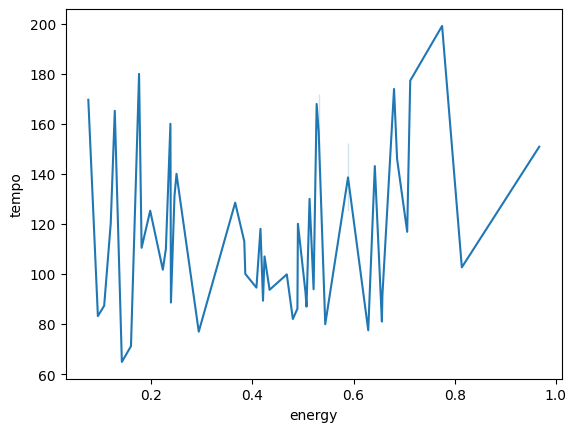

In [16]:
sns.lineplot(data = df_1,
               x = 'energy',
               y = 'tempo')

In [17]:
keymap = {0:'C', 1:'C#', 2:'D', 3:'D#/Eb', 4:'E', 5:'F', 6:'F#/Gb', 
          7:'G', 8:'G#/Ab', 9:'A', 10:'A#/Bb', 11:'B', 12:'C'}
modemap = {0:'minor', 1:'Major'}
df['key-mode'] = df['key'].apply(lambda x: keymap[x]) + '-' + df['mode'].apply(lambda x: modemap[x])
keymode = ['key', 'mode', 'key-mode']
df[keymode].head()

,key,mode,key-mode
0,8,1,G#/Ab-Major
1,1,1,C#-Major
2,11,0,B-minor
3,1,1,C#-Major
4,1,1,C#-Major


In [18]:
df_2 = df.groupby(by=['artist'])
df_2